# Trabalho de IA

Dupla:
Francisco Renêr Lopes Crisostomo e
José Gledson da Silva Oliveira

### Visão Geral do Banco de Dados do Zoológico

**Informações de Fonte:**
- **Criador:** Richard Forsyth
- **Doação:** Richard S. Forsyth  
- **Data:** 15 de maio de 1990

**Informações Relevantes:**
- O banco de dados contém 101 instâncias de animais, categorizados por 17 atributos booleanos e um atributo de classe chamado "tipo". Os animais são divididos em sete classes com base em características como a presença de penas, se são predadores ou se botam ovos.

Esse conjunto de dados pode ser usado para tarefas de aprendizado de máquina, como classificação, onde o objetivo é prever a classe do animal com base em seus atributos.


## Instalando dependencia e importando libs

In [ ]:
!pip install ucimlrepo

In [ ]:

from ucimlrepo import fetch_ucirepo

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Dataset

**Características do Conjunto de Dados:**
- **Número de Instâncias:** 101
- **Número de Atributos:** 18 (1 categórico para nome do animal, 15 booleanos, 2 numéricos)

**Descrição dos Atributos:**
1. **Nome do Animal:** Único para cada animal.
2. **Atributos Booleanos:** Características como presença de pelos, penas, produção de leite, capacidade de voar, ser predador, presença de cauda, entre outros.
3. **Atributos Numéricos:** Número de patas (valores variando de 0 a 8) e o tipo da classe (de 1 a 7).


  **Distribuição por Classe:**  
  - **Classe 1:** (41 animais) mamíferos
  - **Classe 2:** (20 animais) Aves
  - **Classe 3:** (5 animais) Répteis
  - **Classe 4:** (13 animais) Peixes
  - **Classe 5:** (4 animais) Anfíbios
  - **Classe 6:** (8 animais) Insetos
  - **Classe 7:** (10 animais) Invertebrados

In [ ]:
# configuração do display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# fetch dataset
zoo = fetch_ucirepo(id=111)

if zoo is None or zoo.data is None:
    raise ValueError("Os dados não foram carregados corretamente.")

# data (as pandas dataframes)
X = zoo.data.features
y = zoo.data.targets

# mostrando o data_set completo
display(zoo.data.original)

print(f"Número de instâncias: {X.shape[0]}")
print(f"Número de atributos: {X.shape[1]+2}")


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


Número de instâncias: 101
Número de atributos: 18


## Análise do dataset

### Média, Desvio-padrão e Histogramas

In [ ]:
# metadata
print(zoo.metadata)

# variable information
print("\n\n Variaveis")
display(zoo.variables)

# describe
print("\n\n Resultado de média, desvio-padrão")
display(X.describe().transpose())

{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

,name,role,type,demographic,description,units,missing_values
0,animal_name,ID,Categorical,None,None,None,no
1,hair,Feature,Binary,None,None,None,no
2,feathers,Feature,Binary,None,None,None,no
3,eggs,Feature,Binary,None,None,None,no
4,milk,Feature,Binary,None,None,None,no
5,airborne,Feature,Binary,None,None,None,no
6,aquatic,Feature,Binary,None,None,None,no
7,predator,Feature,Binary,None,None,None,no
8,toothed,Feature,Binary,None,None,None,no
9,backbone,Feature,Binary,None,None,None,no




 Resultado de média, desvio-padrão


,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


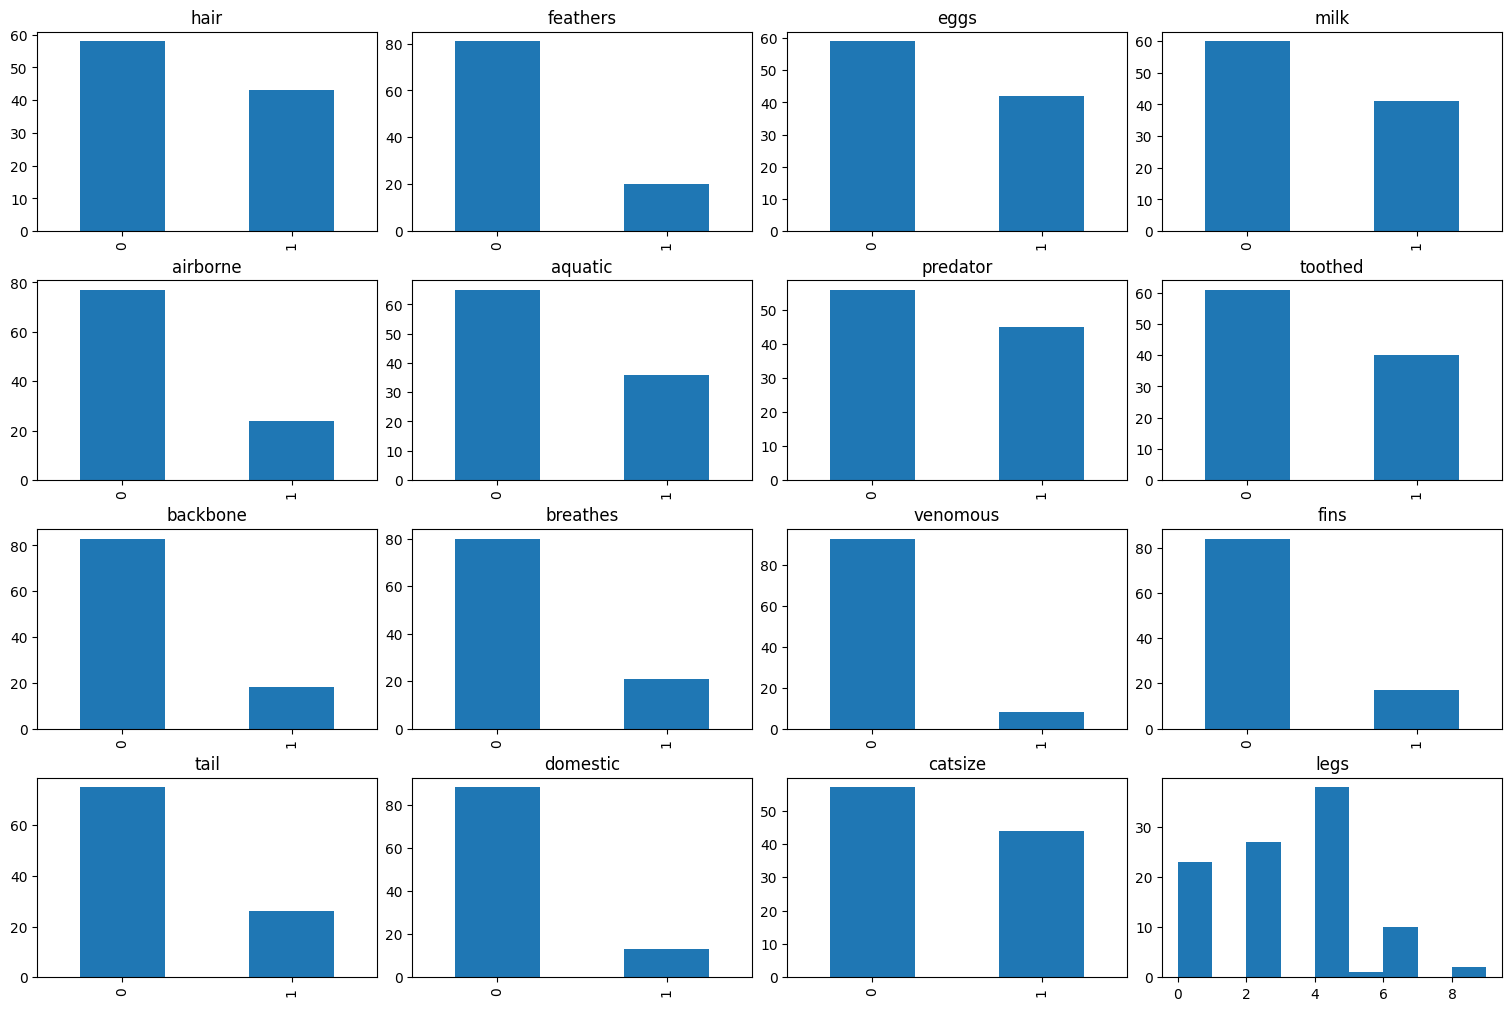

In [ ]:
# Identificar colunas binárias e a coluna 'legs'
binary_columns = X.columns[X.nunique() == 2]
legs_column = 'legs'

# Definir o número de linhas e colunas para os subplots
nrows = 4
ncols = 4

# Criar uma figura e eixos com um tamanho máximo de largura
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), constrained_layout=True)

# Facilitando a iteração
axes = axes.flatten()

# Plotar histogramas binários como gráficos de barras
for i, col in enumerate(binary_columns):
    X[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['0', '1'])
    axes[i].set_xlabel('')

# Plotar o histograma do atributo 'legs'
X[legs_column].hist(ax=axes[len(binary_columns)], bins=range(int(X[legs_column].min()), int(X[legs_column].max()) + 2))
axes[len(binary_columns)].set_title(legs_column)
axes[len(binary_columns)].grid(False)

# Remover eixos não utilizados
for j in range(len(binary_columns) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Treinamento

### Modelos (Linear e MLP)

In [ ]:
class ModeloLinear(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(ModeloLinear, self).__init__()
        # Definindo uma camada linear
        self.linear = torch.nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        return self.linear(x)

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs, n_layers, n_hidden):
        super(MLP, self).__init__()
        self.n_layers = n_layers
        self.layers = torch.nn.ModuleList()
        for i in range(self.n_layers-1):
            if i == 0:
                self.layers.append(torch.nn.Linear(n_inputs, n_hidden))
            else:
                self.layers.append(torch.nn.Linear(n_hidden, n_hidden))

        self.layers.append(torch.nn.Linear(n_hidden, n_outputs))

    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.layers[i](x)
            x = torch.relu(x)
        x = self.layers[-1](x)
        return x

## Classe que lida com o Treinamento

In [ ]:
class HandlerTrainer:

    def __init__(self, n_layers, n_hidden, lr, epochs, num_repeat, total_repeat, X, y, model_type):

        self.X = X
        self.y = y
        self.lr = lr
        self.x_test = None
        self.y_test = None
        self.y_val = None
        self.x_val = None
        self.y_train = None
        self.x_train = None
        self.n_inputs = 15
        self.n_outputs = 7
        self.epochs = epochs
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.num_repeat = num_repeat
        self.total_repeat = total_repeat
        # Inicializa o modelo com base no tipo especificado
        if model_type == 'linear':
            self.model = ModeloLinear(self.n_inputs, self.n_outputs)
        elif model_type == 'mlp':
            self.model = MLP(self.n_inputs, self.n_outputs, n_layers, n_hidden)
        else:
            raise ValueError("Tipo de modelo inválido. Escolha 'linear' ou 'mlp'.")


    def set_datas(self):

        # Definir as features (x) e os alvos (y)
        x = torch.tensor(self.X.iloc[:, :-1].values, dtype=torch.float32)
        y = torch.tensor(self.y.iloc[:, -1].values - 1, dtype=torch.long)

        # Normalizar as features
        scaler = MinMaxScaler()
        x_normalized = scaler.fit_transform(x)

        # Converter features para tensores
        x_normalized = torch.tensor(x_normalized, dtype=torch.float32)

        # Primeira divisão: 70% para treinamento, 30% para teste e validação
        x_train, x_temp, y_train, y_temp = train_test_split(x_normalized, y, test_size=0.3, random_state=42)

        # Segunda divisão: 50% dos 30% para teste (15% do total), 50% dos 40% para validação (15% do total)
        x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.15, random_state=42)

        # Converter para tensores
        self.x_train = x_train.clone().detach().float()
        self.y_train = y_train.clone().detach().long()
        self.x_val = x_val.clone().detach().float()
        self.y_val = y_val.clone().detach().long()
        self.x_test = x_test.clone().detach().float()
        self.y_test = y_test.clone().detach().long()


    def train(self):
        self.model.train()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        losses = []
        val_losses = []
        test_losses = []
        num_epochs = self.epochs
        for epoch in range(num_epochs):
            # Embaralhar os dados
            permutation = torch.randperm(self.x_train.size()[0])
            epoch_loss = 0.0
            for n in permutation:
                optimizer.zero_grad()

                y_hat = self.model(self.x_train[n])
                loss = F.cross_entropy(y_hat, self.y_train[n])
                loss.backward()

                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                optimizer.step()
                epoch_loss += loss.item()

            epoch_loss /= self.x_train.size()[0]
            losses.append(epoch_loss)

            # Avaliar no conjunto de teste
            self.model.eval()

            val_loss = 0.0
            with torch.no_grad():
                for n in range(self.x_val.size()[0]):
                    y_hat = self.model(self.x_val[n])
                    val_loss += F.cross_entropy(y_hat, self.y_val[n]).item()
            val_loss /= self.x_val.size()[0]
            val_losses.append(val_loss)

            # Avaliar no conjunto de teste
            test_loss = 0.0
            with torch.no_grad():
                for n in range(self.x_test.size()[0]):
                    y_hat = self.model(self.x_test[n])
                    test_loss += F.cross_entropy(y_hat, self.y_test[n]).item()
            test_loss /= self.x_test.size()[0]
            test_losses.append(test_loss)

            self.model.train()

            # print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}')

            # if (epoch + 1) % 1 == 0:
            #     print(
            #         f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Test Loss: {test_loss:.4f}')

        # Plotar o gráfico de aprendizagem
        plt.plot(range(num_epochs), losses, label='Training Loss')
        plt.plot(range(num_epochs), test_losses, label='Test Loss')
        plt.plot(range(num_epochs), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f"Learning Curve {self.num_repeat + 1} - Hidden: {self.n_hidden}, Layers: {self.n_layers}, LR: {self.lr}")
        plt.legend()
        plt.show()

        # Dados do treinamento
        print(f"Resultados do treinamento {self.num_repeat + 1}/{self.total_repeat}")
        print("Training Losses:", losses)
        print("Validation Losses:", val_losses)
        print("Test Losses:", test_losses)


    def evaluate_model(self):
        self.model.eval()
        test_loss_ce = 0.0
        correct_predictions = 0
        predictions = []
        with torch.no_grad():
            for n in range(self.x_test.size()[0]):
                y_hat = self.model(self.x_test[n])
                test_loss_ce += F.cross_entropy(
                    y_hat.unsqueeze(0), self.y_test[n].unsqueeze(0)
                ).item()
                predicted_class = torch.argmax(y_hat).item()
                predictions.append(predicted_class)
                if predicted_class == self.y_test[n].item():
                    correct_predictions += 1

        test_loss_ce /= self.x_test.size()[0]
        accuracy = correct_predictions / self.x_test.size()[0]

        return {
            "cross_entropy": test_loss_ce,
            "accuracy": accuracy,
            "n_layers": self.n_layers,
            "n_hidden": self.n_hidden,
            "lr": self.lr,
            "epochs": self.epochs,
            "predictions": predictions,
            "y_test": self.y_test.tolist()
        }


    def evaluate_model_val(self):
        self.model.eval()
        val_loss_cross_entropy = 0.0
        predictions = []
        with torch.no_grad():
            for n in range(self.x_val.size()[0]):
                y_hat = self.model(self.x_val[n])
                y_hat = y_hat.squeeze()

                # Guardar a classe prevista
                predicted_class = torch.argmax(y_hat).item()
                predictions.append(predicted_class)

                # Calcular a perda de cross entropy
                val_loss_cross_entropy += F.cross_entropy(y_hat.unsqueeze(0), self.y_val[n].unsqueeze(0), reduction='sum').item()

        # Calcular a perda média de cross entropy
        val_loss_cross_entropy /= self.x_val.size()[0]

        return {'cross_entropy': val_loss_cross_entropy, 'predictions': predictions}



In [ ]:
def plot_scatter(predictions, y_test):
    plt.scatter(y_test, predictions, label='Predições')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
    plt.xlabel('Saída Desejada')
    plt.ylabel('Predição')
    plt.legend()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

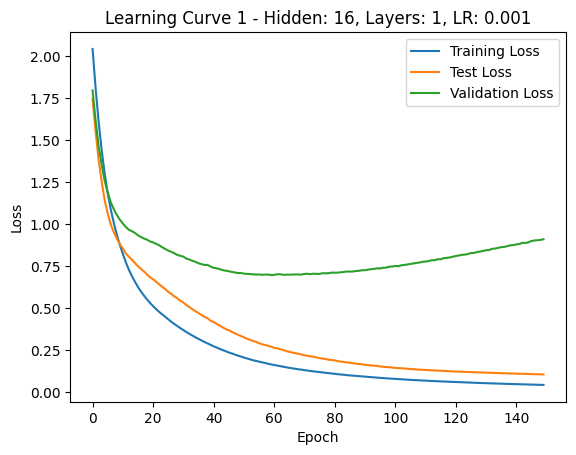

Resultados do treinamento 1/1
Training Losses: [2.0411855118615287, 1.8086576632090978, 1.6093919617789132, 1.4407375752925873, 1.3005030167954308, 1.1833084272486822, 1.0882708419646536, 1.0081044780356543, 0.9372599694345679, 0.8772439850228173, 0.8229245855339936, 0.772305359265634, 0.7281408980488777, 0.6902818644685405, 0.6572289599903992, 0.6258754368339267, 0.5986139507698162, 0.5743142192917211, 0.551786583662033, 0.5308903164097241, 0.5118568261287042, 0.4947315418826682, 0.4776982136070728, 0.4628246422324862, 0.4477459914450135, 0.4337699388552989, 0.41911119664353985, 0.4057272393256426, 0.3939991640193122, 0.3811039890827877, 0.36941558620227233, 0.3577777544834784, 0.34739092364907265, 0.33715857907331415, 0.3265283021011523, 0.3171886573146496, 0.30796675443915383, 0.2986691983948861, 0.2906047464348376, 0.28192294903897813, 0.27322107372539384, 0.26591917549126914, 0.25770676265071546, 0.25078273651057054, 0.2436184528682913, 0.23673237276130488, 0.2308546486576753, 0.2

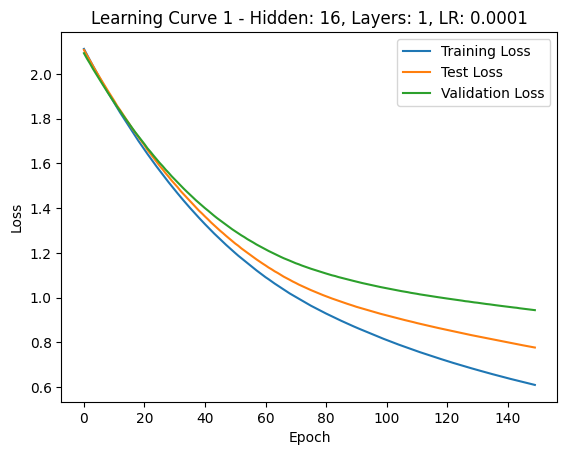

Resultados do treinamento 1/1
Training Losses: [2.112298892225538, 2.0864808797836303, 2.0608512197222026, 2.036125818320683, 2.011335718631744, 1.9871915221214294, 1.963411327770778, 1.9400621209825788, 1.916331592627934, 1.8938905239105224, 1.87109009878976, 1.8494048731667654, 1.8265472667557852, 1.8055376461574009, 1.7836510981832232, 1.7627651623317173, 1.7418124386242457, 1.721271548952375, 1.7010974986212595, 1.6814323050635203, 1.6618835977145603, 1.6423387834003993, 1.6234000716890609, 1.6047020009585788, 1.5863244261060443, 1.5685762235096523, 1.5503461463110788, 1.5329202430588857, 1.5154759083475386, 1.4985799823488508, 1.4818045394761221, 1.4653231739997863, 1.4489999881812505, 1.4329708882740566, 1.4171395233699253, 1.4018683101449694, 1.3867763664041246, 1.371875648839133, 1.357040492977415, 1.342530231816428, 1.328333806991577, 1.3143024155071803, 1.3009265899658202, 1.2869526743888855, 1.273998578105654, 1.2609029488904135, 1.2481889179774692, 1.235466603721891, 1.2232

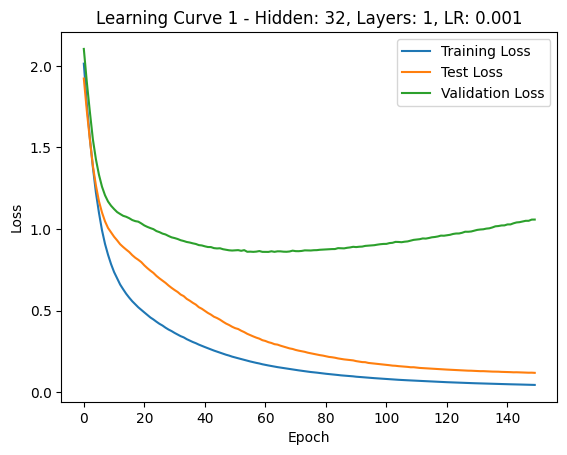

Resultados do treinamento 1/1
Training Losses: [2.013119561331613, 1.7643659148897444, 1.5550910983766828, 1.37780578987939, 1.2220338157245092, 1.0990343736750738, 0.9925216832331248, 0.9084202493940081, 0.8418184327227729, 0.7843615191323416, 0.7358294742447989, 0.6968598268926144, 0.659417619236878, 0.6302867652050086, 0.6025895339037691, 0.5787942888481277, 0.5569102454398359, 0.5382642212722982, 0.5196370414857353, 0.504340817459992, 0.48826599328645637, 0.47268504186400345, 0.45729527276541504, 0.44511931549225536, 0.43130112790635655, 0.418425222299993, 0.407944329349058, 0.394754932820797, 0.3833265628931778, 0.37393743683184894, 0.3627099759876728, 0.3527273118495941, 0.34282152650079556, 0.3353921624432717, 0.3245040546038321, 0.3158092026199613, 0.3071092272842569, 0.2998281554851149, 0.2910431071849806, 0.2832672929790403, 0.27603980050023114, 0.2688567537947425, 0.2614681471671377, 0.25449620257796984, 0.24819780775745, 0.24143370416547572, 0.2360102998891047, 0.2290155227

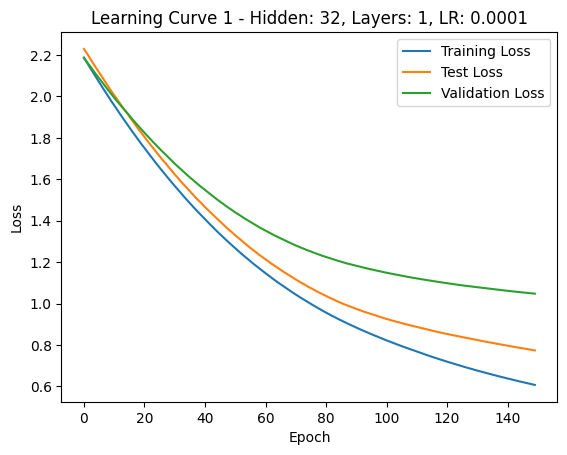

Resultados do treinamento 1/1
Training Losses: [2.1877783468791416, 2.1633939027786253, 2.1394045983042034, 2.115953627654484, 2.092231503554753, 2.069025833266122, 2.0461702636310033, 2.023466786316463, 2.000766599178314, 1.9784691844667708, 1.9568279044968742, 1.935046339035034, 1.9135632361684527, 1.8923615336418151, 1.8715174726077488, 1.8506710733686174, 1.8301966837474277, 1.8100890329905919, 1.790136524609157, 1.7700428707259042, 1.7506876724106926, 1.7313417792320251, 1.7121817793164935, 1.6934785536357335, 1.6745612808636257, 1.6562826548303877, 1.6383299555097308, 1.6203556401388985, 1.6024357063429697, 1.584967006955828, 1.5679186088698251, 1.5505493572780065, 1.5340980870383127, 1.5172747135162354, 1.5006681833948408, 1.4846594742366246, 1.46865850516728, 1.4529372198241097, 1.437736451625824, 1.4219880512782506, 1.4069342425891331, 1.3924569104399, 1.377500877210072, 1.362565756695611, 1.3483578060354506, 1.3342558068888528, 1.3203760777200972, 1.3067884930542537, 1.293329

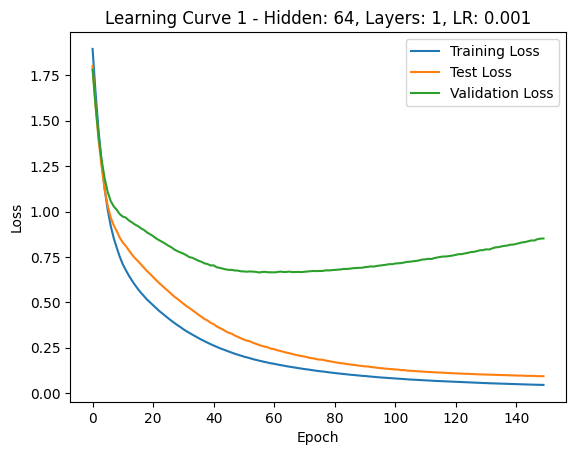

Resultados do treinamento 1/1
Training Losses: [1.89513794864927, 1.651528320993696, 1.4418620322431837, 1.2671839279787882, 1.1246658299650465, 1.0092778380428042, 0.9209314767803465, 0.8525104837758201, 0.8000301867723465, 0.7504045801503317, 0.7091091688190188, 0.6770367872502122, 0.6468920748148645, 0.6204532098557268, 0.5958905826721873, 0.5732125879398414, 0.5526671355324132, 0.5342529486332621, 0.5152828507125378, 0.49978206695190497, 0.48346760145255496, 0.46827149407139845, 0.4530025174043008, 0.4392989877079214, 0.4254775866866112, 0.41237799519939083, 0.3992919335141778, 0.38721543688859256, 0.37490719798952343, 0.364156010028507, 0.3521692282653281, 0.3411228181794286, 0.3315788025036454, 0.32230113643620695, 0.3122500709391066, 0.3032957595373903, 0.29433251353246825, 0.28608572923445275, 0.2775077113216477, 0.26971795864935433, 0.26237763654706736, 0.2551993866850223, 0.2478716878619577, 0.24147775411339742, 0.23513663762382098, 0.22930929787190898, 0.2231793487577566, 0.

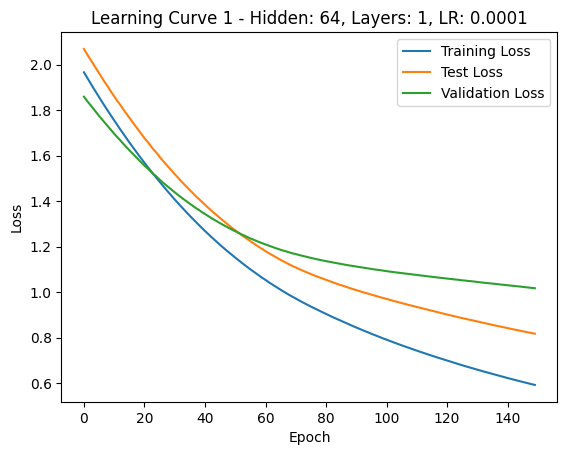

Resultados do treinamento 1/1
Training Losses: [1.966348053727831, 1.944047520841871, 1.9216784289905002, 1.899929506438119, 1.8784603885241917, 1.8573631508009774, 1.8359464645385741, 1.8153868283544268, 1.7949279240199498, 1.7746915136064803, 1.7547801954405648, 1.7350870847702027, 1.715568426677159, 1.6964345233780997, 1.6773551957947868, 1.658550613267081, 1.6402856571333748, 1.6220055188451494, 1.6039840970720565, 1.5863913195473807, 1.5691492557525635, 1.5513888580458506, 1.5346687989575523, 1.5180050926549093, 1.5015553951263427, 1.4853254863194056, 1.4691556411130087, 1.4535204819270542, 1.438052191053118, 1.4227122153554643, 1.4074013318334306, 1.3925459708486285, 1.3781575194426945, 1.3638763231890543, 1.3491410323551722, 1.3355980736868722, 1.321773703609194, 1.3084754977907453, 1.2949471167155675, 1.2820981775011335, 1.2689497785908834, 1.2568693365369523, 1.2439999401569366, 1.231925949880055, 1.2198290467262267, 1.207978525332042, 1.1963982377733504, 1.1850332924297877, 1

In [ ]:
param_grid_linear = {
    "lr": [0.001, 0.0001],
    "n_hidden": [16, 32, 64],
    "n_layers": [1],
}

results_linear = []
num_repeat = 1
epochs = 150

for n_layers in param_grid_linear["n_layers"]:
    for n_hidden in param_grid_linear["n_hidden"]:
        for lr in param_grid_linear["lr"]:
            for repeat in range(num_repeat):
                handle_trainer = HandlerTrainer(
                    n_layers, n_hidden, lr, epochs, repeat, num_repeat, X, y, "linear"
                )
                handle_trainer.set_datas()
                handle_trainer.train()
                evaluation = handle_trainer.evaluate_model()
                results_linear.append(evaluation)
                print(f"Treinado com parâmetros: {n_hidden}, {lr}, {epochs}")
                print(f"Resultados: Cross Entropy = {evaluation['cross_entropy']:.4f}, Accuracy = {evaluation['accuracy']:.4f}")

# Exibir todos os resultados
for result in results_linear:
    print(result)

### MLP

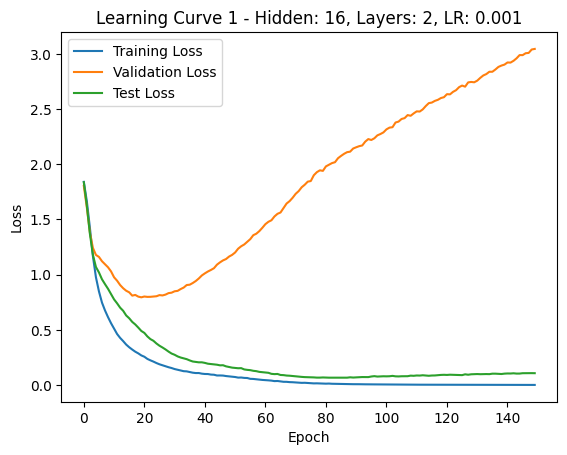

Resultados do treinamento 1/1
Training Losses: [1.8404717768941607, 1.6634235211781092, 1.4269925722054073, 1.1676367044448852, 0.976335762654032, 0.8478241131774017, 0.7466003206159387, 0.6754143349560243, 0.6146056448774678, 0.5594746510897364, 0.5105974519359214, 0.4618752273065703, 0.4266508767048695, 0.39758757070106054, 0.36613583883403666, 0.3418649927846023, 0.32101234144398144, 0.3017689119026597, 0.2864460898563266, 0.26801974213282975, 0.2560716262652672, 0.2363807252641501, 0.22338385624212345, 0.2118952068899359, 0.1988780522752287, 0.1875600571744144, 0.17869017467434917, 0.17004232690835905, 0.16096029379737697, 0.15369370630942286, 0.14450535216102642, 0.13783589252603373, 0.13192163208399765, 0.1250827558272119, 0.12340131311378043, 0.11696522728639788, 0.11141023879005973, 0.10819748815348638, 0.1084580553487675, 0.10266392825204614, 0.09978911185005147, 0.09930372406129859, 0.09426649700201649, 0.09302154344124054, 0.08614916869222984, 0.08639844815812207, 0.08541278

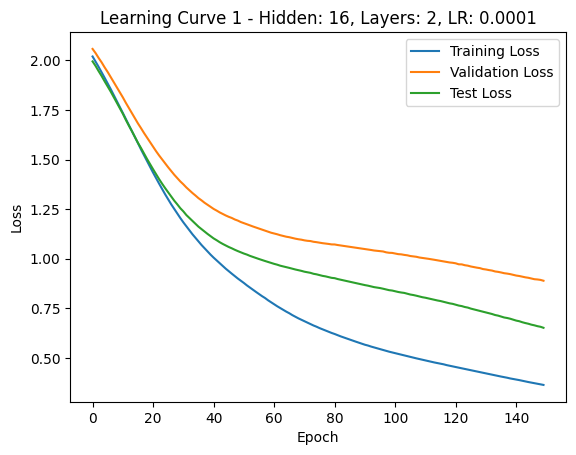

Resultados do treinamento 1/1
Training Losses: [2.020109816959926, 1.99414439031056, 1.9676306179591587, 1.9402306403432574, 1.9122048667498996, 1.8839338796479361, 1.855358042035784, 1.8255634886877878, 1.7962149739265443, 1.7654082826205661, 1.7353595205715724, 1.7044349023274012, 1.6735286678586687, 1.6434067623955864, 1.6135419573102678, 1.5828376548630851, 1.5514181511742728, 1.52179400069373, 1.492121595144272, 1.4632579037121365, 1.4339764399187906, 1.4059139336858477, 1.378342251266752, 1.3512577176094056, 1.3244373440742492, 1.2988046663148063, 1.2739845607961928, 1.2508553436824255, 1.227293518611363, 1.2050972270114082, 1.183461172240121, 1.1631765638078961, 1.1429405655179705, 1.1235111743211745, 1.1051453079496112, 1.0872541585138866, 1.0692489606993538, 1.0529964029788972, 1.0373029923864774, 1.020440741947719, 1.0055366831166404, 0.9914917890514646, 0.9770244236503328, 0.9632703076515879, 0.9498230135866574, 0.9368796791349139, 0.9246225010071482, 0.9120748079248837, 0.9

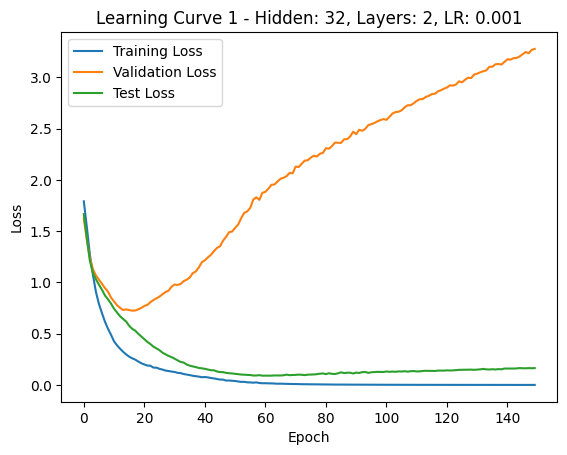

Resultados do treinamento 1/1
Training Losses: [1.7906421899795533, 1.5370750682694572, 1.2711764991283416, 1.075132227582591, 0.9066271072519677, 0.7892439574003219, 0.6996749025636486, 0.615243771086846, 0.5471770846950156, 0.4879137492472572, 0.42418665796784416, 0.3850959878780746, 0.3523806021249454, 0.323264288010874, 0.2972216563266037, 0.27543079035489687, 0.2596377806222465, 0.2465403725758993, 0.22826205763932583, 0.21132545908913017, 0.2000849548095305, 0.1888527350716426, 0.18726931163608762, 0.16902164281013288, 0.1684860320412554, 0.15729980392913734, 0.14973659385827237, 0.14034184371536998, 0.13519526360739423, 0.1306852702092978, 0.12665066857423102, 0.11810646875362311, 0.11534790939102614, 0.10630678361132076, 0.10124694013003525, 0.09599680098846355, 0.08935240755547835, 0.08495559462420975, 0.08129998976323155, 0.07497772214846918, 0.0773063062413712, 0.07352096882927331, 0.06772010533189002, 0.06349390895837652, 0.05749979967326258, 0.05236446263339271, 0.05224439

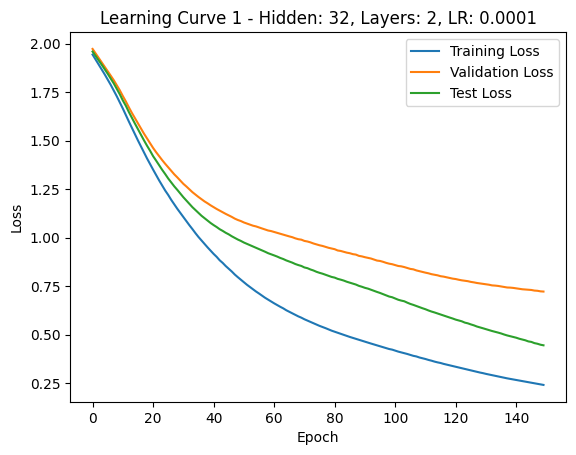

Resultados do treinamento 1/1
Training Losses: [1.9441523024014065, 1.9187644175120762, 1.8933345794677734, 1.8676048466137478, 1.8424181972231184, 1.81552551814488, 1.78813008751188, 1.7589047397886004, 1.7292134659630911, 1.6981705103601727, 1.6660119329180036, 1.6320663860866003, 1.5988380551338195, 1.565949763570513, 1.5331829036985125, 1.501490890128272, 1.4702573835849762, 1.4391096149172102, 1.4088111221790314, 1.3795238154275076, 1.3512607140200479, 1.3228419865880694, 1.295549545117787, 1.2692097442490713, 1.2433694643633706, 1.2205742137772697, 1.1951847425528934, 1.1720573944704873, 1.1494119818721498, 1.1286116940634592, 1.1069504324878965, 1.0853847116231918, 1.0645525744983129, 1.0446154092039381, 1.0237193001168114, 1.0040271905916078, 0.9859498662608011, 0.9680065561618124, 0.9505384130137308, 0.933499897803579, 0.9168508220996175, 0.9017849504947663, 0.8840716723884855, 0.8704313386763846, 0.8542653248778411, 0.8401236930063792, 0.8261891371437482, 0.8104328194899219, 

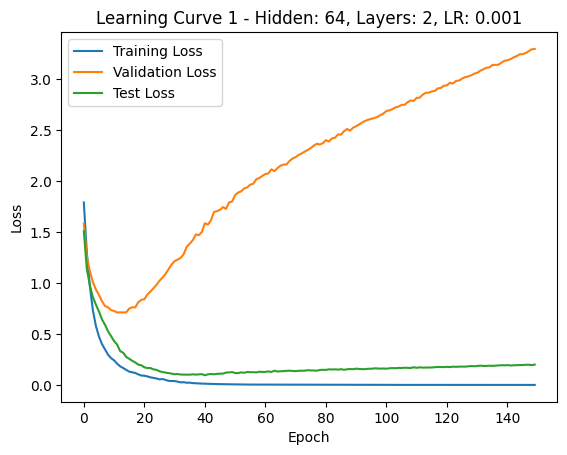

Resultados do treinamento 1/1
Training Losses: [1.7916484389986311, 1.2976239268268859, 0.968331394557442, 0.7314833971272622, 0.5778397228568792, 0.47504319486075214, 0.40065056437493435, 0.3478808020906789, 0.2968338212031605, 0.2632928911629798, 0.24132682180497794, 0.20874465646255494, 0.18270979679655283, 0.16622568263971646, 0.1475633608825904, 0.13059634928525027, 0.12394079756091482, 0.1174119295968142, 0.10343815441509442, 0.09206334200072368, 0.09054419238319887, 0.08357585292126585, 0.07466325952555053, 0.06843965767516888, 0.06331455958425067, 0.05482970475568436, 0.058113323169527574, 0.048818567136186174, 0.04031963104165957, 0.03814303135773766, 0.03797293849638663, 0.03237397677294211, 0.02511175535577682, 0.026679912560419846, 0.021571442781714724, 0.022079818079094236, 0.017882955359839667, 0.016003597297406358, 0.013817783855691752, 0.013098692584026139, 0.012460289860298093, 0.010536536782767923, 0.010454698525895116, 0.008913091620239096, 0.008379118039114734, 0.00

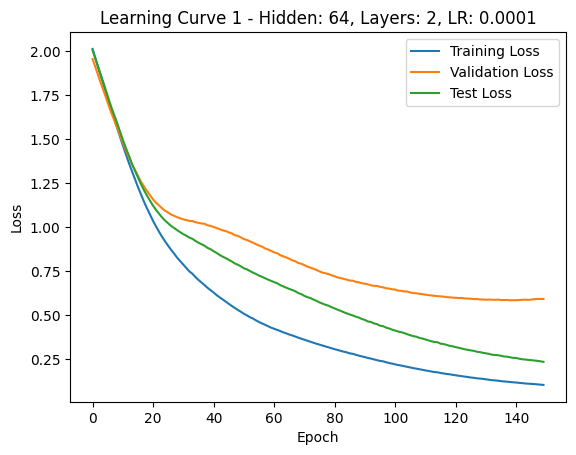

Resultados do treinamento 1/1
Training Losses: [2.0109263573374068, 1.9534178938184465, 1.896989677633558, 1.8427757433482579, 1.787090425831931, 1.7318386605807714, 1.676282090800149, 1.6218460985592433, 1.5681376678603036, 1.5159368310655867, 1.463356384209224, 1.413607828106199, 1.3631721436977386, 1.317603257724217, 1.2705657422542571, 1.2262030269418445, 1.183703842333385, 1.1426044315099717, 1.1048147044011525, 1.069454237818718, 1.0336101106234958, 1.0016279518604279, 0.9713184839912823, 0.9427320231284414, 0.9164017941270556, 0.8918488147003311, 0.8683703780174256, 0.8472444689699582, 0.8238345163209098, 0.8043650660131659, 0.7850370007966246, 0.7648652035210813, 0.7468224378568785, 0.7334052036383323, 0.7149404038808176, 0.6983774691820145, 0.6838521475238459, 0.6693566657602787, 0.65375415773264, 0.640394335399781, 0.6271948592471225, 0.6122433418141944, 0.5998225202251758, 0.5869392150480832, 0.5753215839554157, 0.5628863628953695, 0.5507588464234556, 0.5391512662704502, 0.5

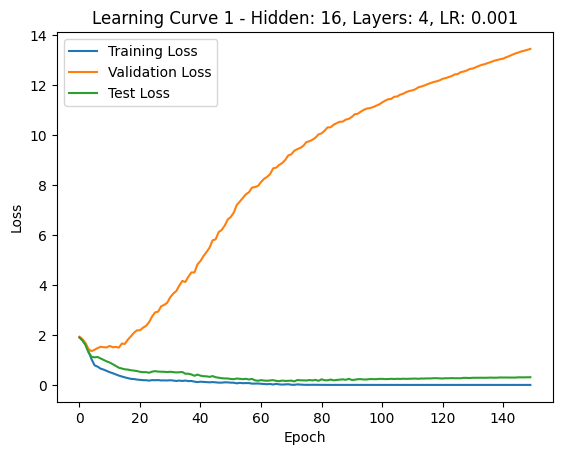

Resultados do treinamento 1/1
Training Losses: [1.897969228880746, 1.7851021783692496, 1.615519085952214, 1.341696332182203, 1.028268167482955, 0.7850079067583595, 0.7317321586622191, 0.6506125497099544, 0.6134060630608084, 0.5618735793828299, 0.5091313792650388, 0.4691552378258036, 0.41999985660825456, 0.3738206319319683, 0.337718596045618, 0.30242423622881426, 0.27269824024738876, 0.2422569432468403, 0.23550721238498226, 0.21421592136529008, 0.20208549579942234, 0.19083313811757502, 0.1875759924913187, 0.1728175791195099, 0.19248565443101273, 0.188099819285292, 0.1936115710066328, 0.17894335672353917, 0.18206219996497697, 0.17756152972033307, 0.1884180171229153, 0.17578737764155708, 0.1597079825358118, 0.17374003768067528, 0.15900395057984237, 0.17551348293189742, 0.15251763562841267, 0.1575466079087034, 0.13216720589376305, 0.11264247550921677, 0.12918815129913647, 0.12139371473491077, 0.11491630825721585, 0.10382302095317104, 0.11376949476384003, 0.10112719923909676, 0.091795968948

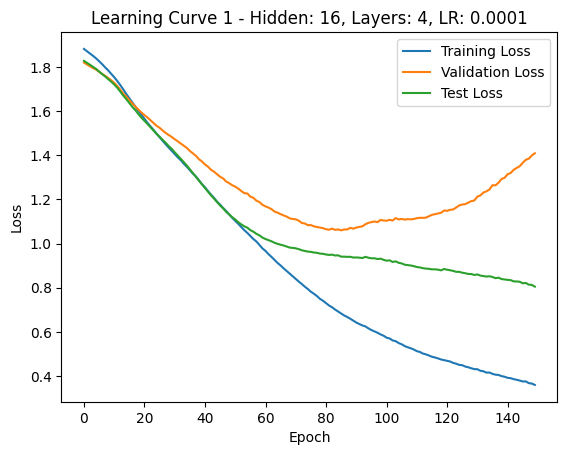

Resultados do treinamento 1/1
Training Losses: [1.8822846157210213, 1.8714627402169364, 1.8612433978489467, 1.8509698033332824, 1.8394309418542045, 1.8267553516796657, 1.8133028643471854, 1.7987896527562823, 1.7850842220442635, 1.769902401311057, 1.7540619100843158, 1.7371202945709228, 1.7184701238359723, 1.6987326468740191, 1.6777916772024972, 1.6584508402006968, 1.6395704422678266, 1.6198745676449366, 1.6012488177844457, 1.5833954572677613, 1.564784732886723, 1.547543615102768, 1.5309353411197661, 1.515178781747818, 1.49801139490945, 1.4819811131272997, 1.4662336758204868, 1.4503250649997166, 1.435507447378976, 1.4203394676957812, 1.4061716948236738, 1.3909549857888903, 1.3780890311513627, 1.361960210118975, 1.34823953637055, 1.3329950660467147, 1.3172507073198045, 1.3043661343199866, 1.286861759849957, 1.2695917142289026, 1.2552417836018972, 1.2377374236072813, 1.2216542865548814, 1.2071650307093347, 1.1898839907986778, 1.1767322291220939, 1.16135918540614, 1.147614507909332, 1.1321

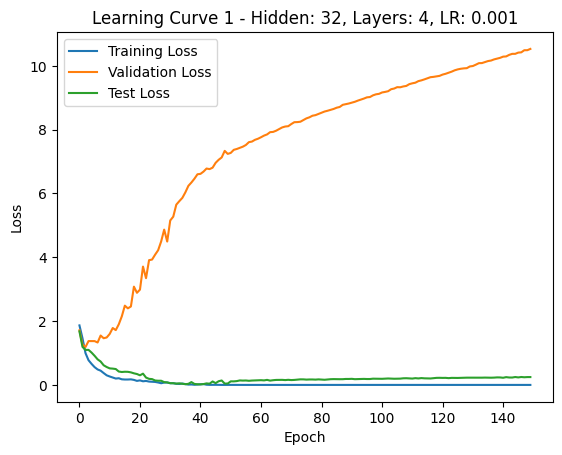

Resultados do treinamento 1/1
Training Losses: [1.8653074162346976, 1.46428958433015, 0.9956943734149848, 0.7742141179507598, 0.6595972735684232, 0.5578079798541564, 0.4850389636362836, 0.4468104910296721, 0.37157702038197643, 0.30097551420580465, 0.26407249319101017, 0.2325395953126385, 0.2000109341588021, 0.20923753690538952, 0.1758888091317723, 0.1695063669164353, 0.16951082916031218, 0.17433589174974518, 0.15755872131072204, 0.12644213194887147, 0.14192793598349454, 0.1140046389728533, 0.12459175883062536, 0.10506726356572602, 0.10015946358798829, 0.09360714484925146, 0.07629048299630604, 0.05314745160998687, 0.07325435340429587, 0.0763156157348346, 0.05289993573843016, 0.054240912018719556, 0.035906643431147654, 0.029862363206348164, 0.04245118701971283, 0.025516523805653637, 0.01033383205540466, 0.013741490170392417, 0.004306956827929298, 0.010502877142534674, 0.013664972468765363, 0.026008221945325465, 0.006523431865812362, 0.001705390270604669, 0.0028999117627807078, 0.00353884

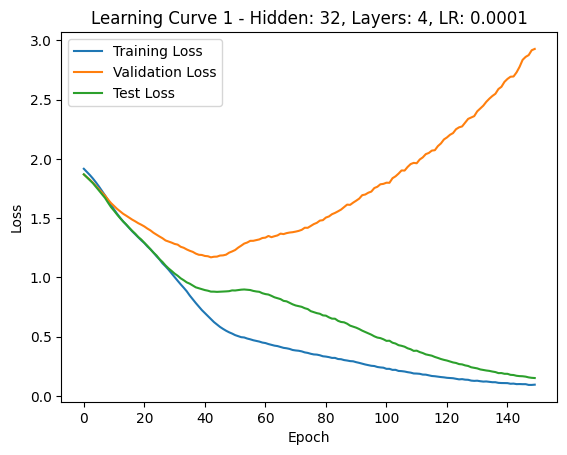

Resultados do treinamento 1/1
Training Losses: [1.9161377736500331, 1.8902782338006157, 1.8632681029183524, 1.8339303885187421, 1.8013240371431622, 1.7665355580193656, 1.729723460333688, 1.6917074356760298, 1.6528787170137678, 1.611974605492183, 1.5725084619862693, 1.536350749220167, 1.503034177848271, 1.4723425814083644, 1.4442648206438338, 1.4167883387633733, 1.3881609908172063, 1.3626129916736058, 1.3379124449832098, 1.3123483559914997, 1.2897072574922017, 1.2609400915248052, 1.2374203609568732, 1.209752636722156, 1.1787884163005011, 1.1516665111695017, 1.1183305599859783, 1.0930870809725353, 1.0647685956742083, 1.033434426145894, 1.0020115018955298, 0.9717691413526024, 0.941608466314418, 0.9132180820086173, 0.8830845775082707, 0.847112497101937, 0.8157089783144849, 0.7837569584271737, 0.7546546558184283, 0.7243615584048841, 0.6990473258042974, 0.6739192775184555, 0.6481735567961421, 0.6231555278812136, 0.6025244173327727, 0.5822519985759365, 0.5655636601482651, 0.5501706073925431, 

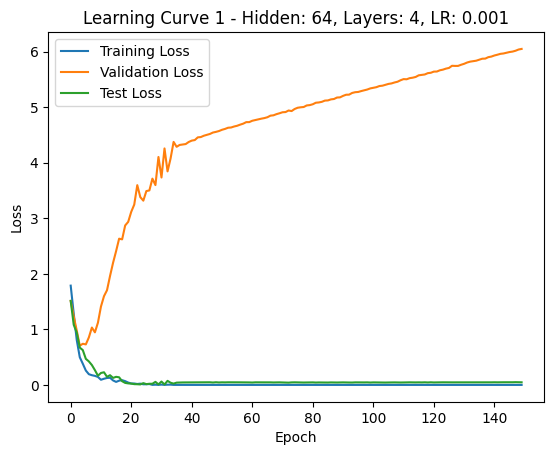

Resultados do treinamento 1/1
Training Losses: [1.787226950270789, 1.2828279419669084, 0.809020641609095, 0.4985117917826366, 0.38138852250059635, 0.25889929325255384, 0.19312229335233236, 0.1747700481249402, 0.16279698835860473, 0.14380643329051443, 0.09301380262036868, 0.1111166012427215, 0.12514221403206258, 0.12910259862285003, 0.08083693405285755, 0.054334916635165036, 0.0764855628997582, 0.08516232776280991, 0.06818257238790092, 0.04259895967860611, 0.02607698546361884, 0.02557488337013386, 0.016970868088712416, 0.023146043233553217, 0.011452099311383027, 0.011828964196822004, 0.01574576706341385, 0.0011114519448717885, 0.0042021924626468934, 0.0006095401141281391, 0.005682844659007966, 0.0008084120611406271, 0.004201837295804316, 0.005146854899486795, 0.0004279972851630224, 0.0006060712417482454, 0.00016008182847428997, 0.00013000198736879805, 0.00011314599890438006, 0.00010151719215879698, 9.278965655151897e-05, 8.65472644434817e-05, 7.976202396276579e-05, 7.380882546651638e-05

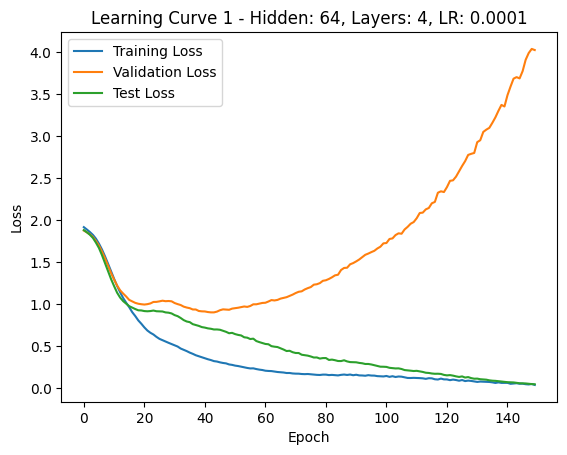

Resultados do treinamento 1/1
Training Losses: [1.9187450187546866, 1.8905835066522871, 1.8607190932546342, 1.8265889610563006, 1.7817792756216866, 1.72249949829919, 1.6529644846916198, 1.5717303361211503, 1.4841850893838064, 1.393024753672736, 1.3047102949448994, 1.2201348372868128, 1.1440825519817217, 1.0757861184222357, 1.0194128661283426, 0.9666397911097322, 0.9072629539029938, 0.861255271466715, 0.8093715214436608, 0.7698873096012644, 0.7265085261847292, 0.6891745914505528, 0.6624427343452616, 0.6419739365777267, 0.61368852481246, 0.5899588809149073, 0.5740089012709048, 0.559092829482896, 0.5429579520032608, 0.5285749289340207, 0.513778872210865, 0.4986556468431705, 0.475067286765469, 0.45966280245255414, 0.4444477763534191, 0.4265992288003742, 0.4120113847619255, 0.3950946017160147, 0.3831391428414333, 0.3704120010328812, 0.3605914843322742, 0.3475022374984941, 0.33772985921781845, 0.3252703753221015, 0.32027342942518383, 0.3105097295042859, 0.30330024190230426, 0.298410637944055

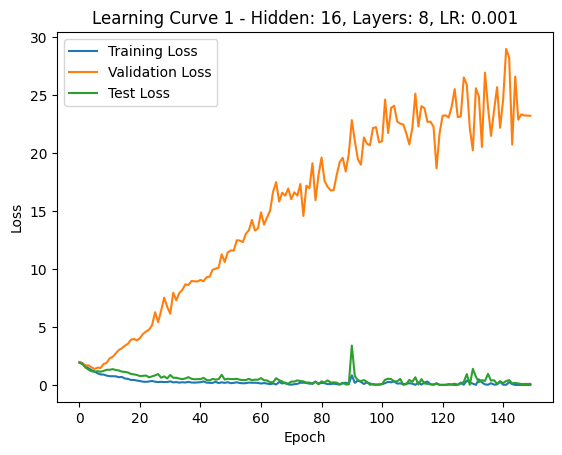

Resultados do treinamento 1/1
Training Losses: [1.9709612659045628, 1.8807740858622959, 1.6176852686064584, 1.4342936893392886, 1.2704027679083603, 1.1588650970254093, 0.9959434264056783, 0.9025293773148275, 0.8928675253428602, 0.8017104024596587, 0.7525887687489428, 0.7499597674023659, 0.7446686232821645, 0.6643308463134937, 0.6872580626542782, 0.556850935721585, 0.5211233029529987, 0.4322600498345959, 0.42879929440089526, 0.3740079493263043, 0.33529493859923604, 0.28179242348409, 0.2670908783180461, 0.29630773663010845, 0.3415384627450164, 0.275769011390773, 0.2468725635960382, 0.264683801139253, 0.2485809181945151, 0.24570678276725297, 0.3095773555176867, 0.21915377546086218, 0.24414769632669991, 0.1973586882738499, 0.23001849040311992, 0.20907648613539415, 0.26029729926090517, 0.20954426370743034, 0.1976755130088908, 0.21328598341792906, 0.23257113978070124, 0.30628156092604725, 0.20058628238563553, 0.17986313400708615, 0.1753714224905915, 0.2707180579722803, 0.15516020951550016, 0

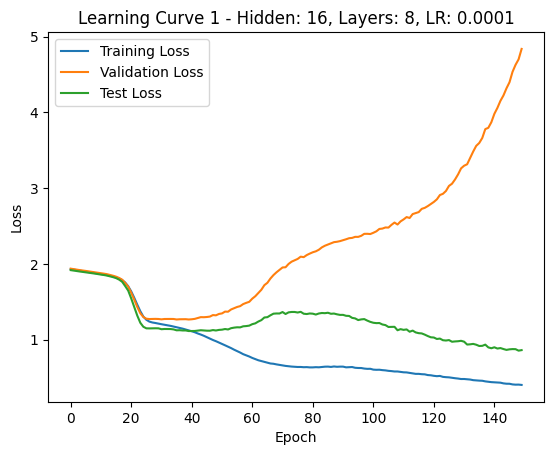

Resultados do treinamento 1/1
Training Losses: [1.9307344896452767, 1.923371582371848, 1.9164743644850595, 1.9099169288362776, 1.9032312767846244, 1.8968383158956255, 1.8904388955661229, 1.8839731880596706, 1.877651344026838, 1.8714617950575692, 1.8649771690368653, 1.858417330469404, 1.8513758199555532, 1.8433498007910591, 1.8327267714909146, 1.8201649580683028, 1.8058019501822336, 1.7861947519438608, 1.753529017312186, 1.7042868512017386, 1.6360103768961771, 1.551845202275685, 1.4608418967042651, 1.374790064564773, 1.3035389883177622, 1.2611212835248027, 1.2367643219019686, 1.2252571194432675, 1.2184500413680714, 1.2101288750235524, 1.2025718025597079, 1.1955385455994734, 1.188037640302043, 1.1808046246645971, 1.171649274110262, 1.1632785486290231, 1.1539408856537192, 1.144002823122511, 1.1327830927113869, 1.1215582260429593, 1.1094611677174855, 1.09672849996215, 1.0802251542718815, 1.0658956960641912, 1.0496209664835727, 1.0303704715466926, 1.0125869900919497, 0.9940186046097161, 0.9

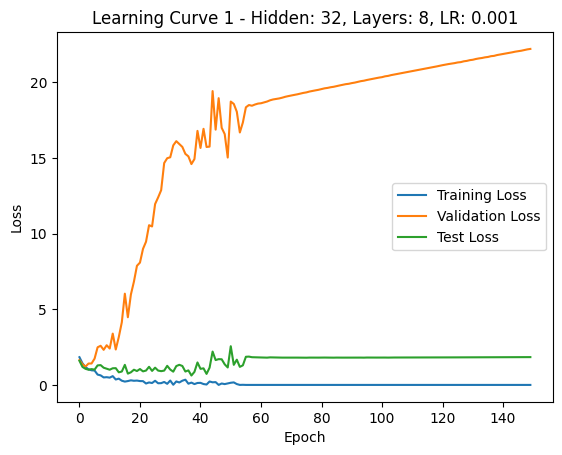

Resultados do treinamento 1/1
Training Losses: [1.8311789989471436, 1.424753856233188, 1.177135724893638, 1.0305957200837188, 0.9645438813616888, 0.9502467822886371, 0.6825413044410903, 0.6310520615743319, 0.49487951007786424, 0.5108166470226934, 0.4808925764055205, 0.5803944891147186, 0.35826518659398676, 0.4151001713831387, 0.27805890552231816, 0.2202995208804558, 0.2549722065129994, 0.30331837294915465, 0.27397972390826236, 0.2867147583406953, 0.2543344961289806, 0.24995957441154043, 0.09368731463626746, 0.1637578017591759, 0.12640130688559656, 0.2739962829555983, 0.10947455500009694, 0.11758028037920536, 0.19540857493121147, 0.07289412468116885, 0.2903159955556938, 0.010935507576121495, 0.2306052634747575, 0.16153536920015107, 0.27741240349868873, 0.34540968768136926, 0.08085727128680428, 0.15315849974136872, 0.05488427457107262, 0.12904753503496177, 0.13677027034884293, 0.057838550913210135, 0.02711892244215812, 0.22610998859618608, 0.17246812193934916, 0.1855868416213866, 0.00138

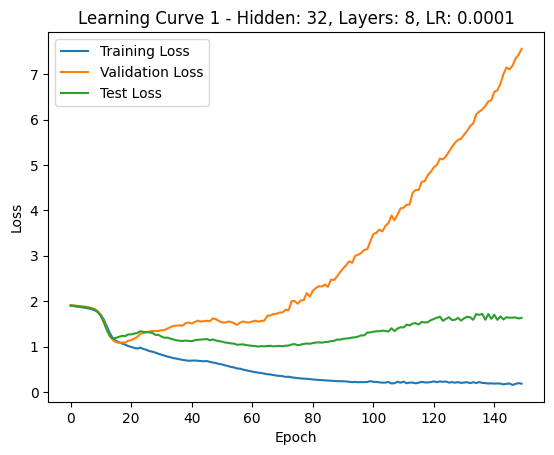

Resultados do treinamento 1/1
Training Losses: [1.8982216290065221, 1.8895344580922808, 1.8808485661234176, 1.8718654104641506, 1.862847716467721, 1.8521006396838597, 1.8388908232961383, 1.8218724846839904, 1.798461857863835, 1.760966306073325, 1.6968391827174596, 1.588250117642539, 1.4322208685534341, 1.2865638937268937, 1.1728973976203374, 1.122855193061488, 1.0938853815996221, 1.0637846085375973, 1.0419397522296225, 1.0101126957950848, 0.9901222636058394, 0.9700882059322404, 0.9547125296866787, 0.9758678002848423, 0.947374367008784, 0.9272481876625014, 0.8980067790552442, 0.8867709923103185, 0.8652370363739984, 0.8397164475538634, 0.8187757744287539, 0.7966813527845911, 0.7770612346424189, 0.7622616146824189, 0.7434334392010766, 0.7330935081816279, 0.7177553805572513, 0.7045600806163358, 0.6946263833037977, 0.6860200691976518, 0.6887429689639248, 0.6919201553774266, 0.685321574155075, 0.6801937687002854, 0.674494317654171, 0.6800506730925657, 0.6606326657247596, 0.6482380778541224, 

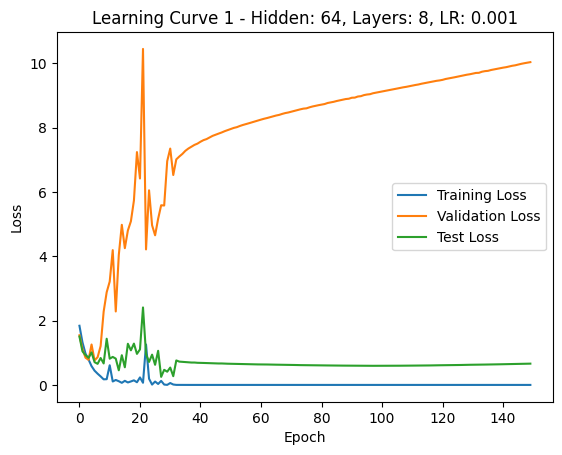

Resultados do treinamento 1/1
Training Losses: [1.8400526097842624, 1.3229442456421177, 0.9741354678038728, 0.7912294739520592, 0.5840293891744088, 0.4428751990690481, 0.34893078634187935, 0.26487096019156725, 0.17355298198889924, 0.17857633895867225, 0.6115617061162528, 0.10637328997092134, 0.15444166594021627, 0.11498423682363475, 0.06550837931890661, 0.12738795368635872, 0.07665837437384886, 0.10806493973336617, 0.1431790316951762, 0.08312665427979299, 0.23341569323309264, 0.06710621358789533, 1.2570542600725958, 0.1917738562660442, 0.010884362002849457, 0.10518410969329202, 0.029236175416845863, 0.12550121412026993, 0.011198379952315816, 0.0015086204860870517, 0.05878231106655625, 0.012776377287532422, 0.0010753797608808822, 3.555045197123669e-05, 2.560641628964585e-05, 2.0965610043077733e-05, 1.7106130014354902e-05, 1.4421173270307009e-05, 1.2577169012014824e-05, 1.1058374196539131e-05, 9.587203683736334e-06, 8.567241290486599e-06, 7.656242476120463e-06, 6.947873077020209e-06, 6.2

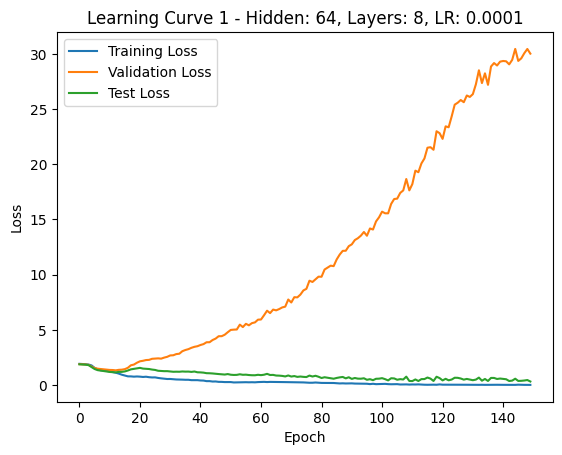

Resultados do treinamento 1/1
Training Losses: [1.9202385834285192, 1.904613595349448, 1.8860366037913732, 1.85815178666796, 1.7766910621098109, 1.5588542180401939, 1.423988338453429, 1.3395557607923234, 1.3179798153894289, 1.2839048081210682, 1.2307058294702853, 1.1800656282409494, 1.1157254812773316, 1.0343877994156043, 0.9335330658725329, 0.8631745157813254, 0.7861094260821119, 0.7828707827438068, 0.7579065575547117, 0.7756499662446523, 0.7590508299453567, 0.7307509194860489, 0.7524844387121058, 0.7101525259825784, 0.6874459922646046, 0.6920486014883863, 0.6413523643479753, 0.6046312701950878, 0.5787826569963662, 0.5452496668862945, 0.548114453418985, 0.5281826349701403, 0.5030116681453113, 0.5004979429969727, 0.4879823061316951, 0.47560973905094994, 0.47538205502695435, 0.4415186966241785, 0.43916143385926926, 0.44050957913369637, 0.411880855506504, 0.40274485033209384, 0.3518270058403722, 0.35304075331773105, 0.31603808346003986, 0.3222091409269333, 0.2874409832012905, 0.284489332

In [ ]:
param_grid_mlp = {
    "n_layers": [2, 4, 8],
    "n_hidden": [16, 32, 64],
    "lr": [0.001, 0.0001],
}

results_mlp = []

for n_layers in param_grid_mlp["n_layers"]:
    for n_hidden in param_grid_mlp["n_hidden"]:
        for lr in param_grid_mlp["lr"]:
            for repeat in range(num_repeat):
                handle_trainer = HandlerTrainer(
                    n_layers, n_hidden, lr, epochs, repeat, num_repeat, X, y, "mlp"
                )
                handle_trainer.set_datas()
                handle_trainer.train()
                evaluation = handle_trainer.evaluate_model()
                results_mlp.append(evaluation)
                print(f"Treinado com parâmetros: {n_layers, n_hidden}, {lr}, {epochs}")
                print(f"Resultados: Cross Entropy = {evaluation['cross_entropy']:.4f}, Accuracy = {evaluation['accuracy']:.4f}")

# Exibir todos os resultados
for result in results_mlp:
    print(result)

In [ ]:
# Cálculo da média e desvio-padrão das acurácias

accuracies_linear = [result['accuracy'] for result in results_linear]
accuracies_mlp = [result['accuracy'] for result in results_mlp]

mean_accuracy_linear = np.mean(accuracies_linear)
std_accuracy_linear = np.std(accuracies_linear)

mean_accuracy_mlp = np.mean(accuracies_mlp)
std_accuracy_mlp = np.std(accuracies_mlp)

print(f"Modelo Linear - Média da Acurácia: {mean_accuracy_linear:.4f}, Desvio-Padrão: {std_accuracy_linear:.4f}")
print(f"Modelo MLP - Média da Acurácia: {mean_accuracy_mlp:.4f}, Desvio-Padrão: {std_accuracy_mlp:.4f}")

Modelo Linear - Média da Acurácia: 0.8269, Desvio-Padrão: 0.1364
Modelo MLP - Média da Acurácia: 0.8974, Desvio-Padrão: 0.0870


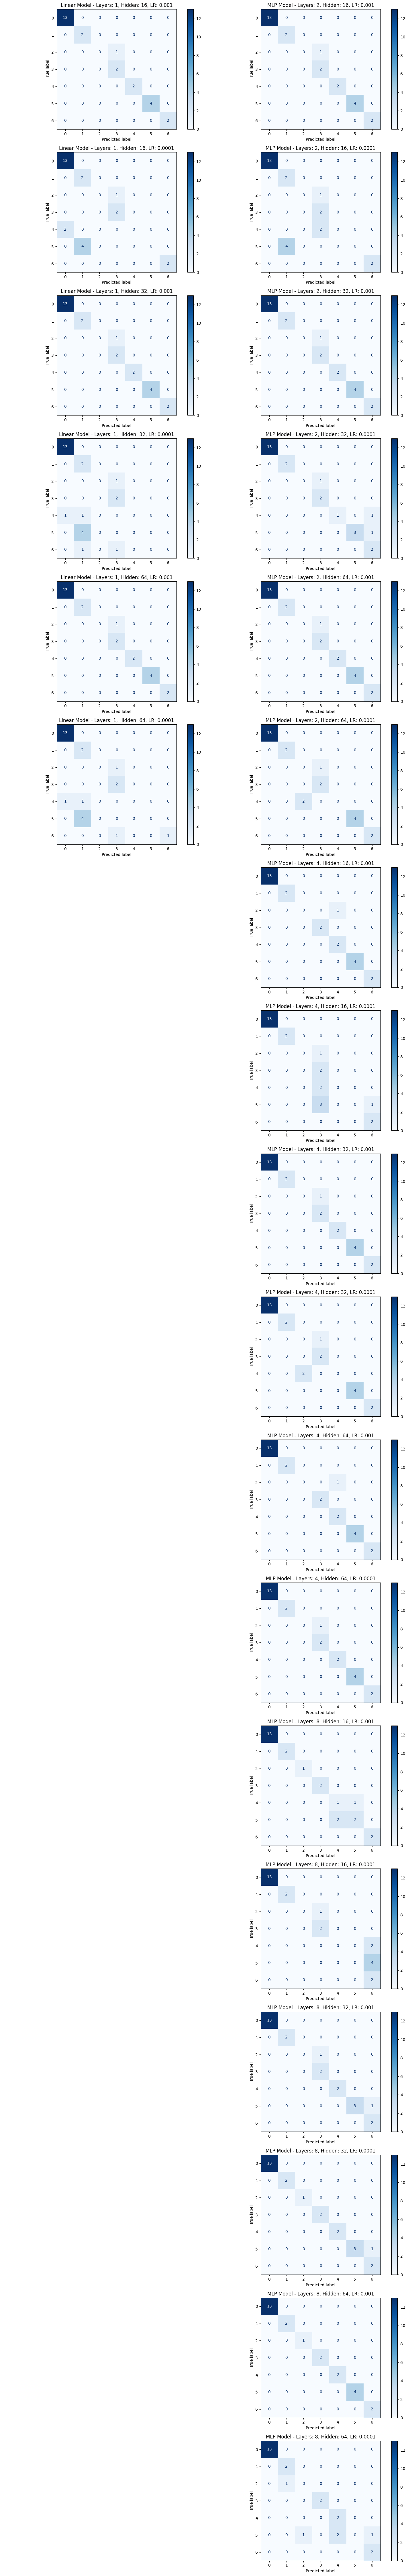

In [ ]:
# Criar figura e eixos (considerando o tamanho de results_mlp)
fig, axes = plt.subplots(len(results_mlp), 2, figsize=(15, 5 * len(results_mlp)))

# Plotagem das matrizes de confusão para cada modelo
for i in range(len(results_mlp)):
    # Avaliação e plotagem da matriz de confusão para o modelo linear
    if i < len(results_linear):
        result_linear = results_linear[i]
        cm = confusion_matrix(result_linear['y_test'], result_linear['predictions'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i, 0], cmap=plt.cm.Blues)
        axes[i, 0].set_title(f"Linear Model - Layers: {result_linear['n_layers']}, Hidden: {result_linear['n_hidden']}, LR: {result_linear['lr']}")
    else:
        axes[i, 0].axis('off')

    # Avaliação e plotagem da matriz de confusão para o modelo MLP
    result_mlp = results_mlp[i]
    cm = confusion_matrix(result_mlp['y_test'], result_mlp['predictions'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i, 1], cmap=plt.cm.Blues)
    axes[i, 1].set_title(f"MLP Model - Layers: {result_mlp['n_layers']}, Hidden: {result_mlp['n_hidden']}, LR: {result_mlp['lr']}")

plt.tight_layout()
plt.show()